In [9]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import matplotlib.pyplot as plt

matplotlib: 3.4.2


In [2]:
def prepare_data(df, forecast_col, forecast_out, test_size):
    # creating new column called label with the last 5 rows are nan
    label = df[forecast_col].shift(-forecast_out)
    X = np.array(df[[forecast_col]])  # creating the feature array
    X = preprocessing.scale(X)  # processing the feature array
    # creating the column i want to use later in the predicting method
    X_lately = X[-forecast_out:]
    X = X[:-forecast_out]  # X that will contain the training and testing
    label.dropna(inplace=True)  # dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, y, test_size=test_size, random_state=0)  # cross validation

    response = [X_train, X_test, Y_train, Y_test, X_lately]
    return response

In [3]:
df = pd.read_csv("GOOG.csv")
#df = df[df.symbol == "GOOG"]

<AxesSubplot:>

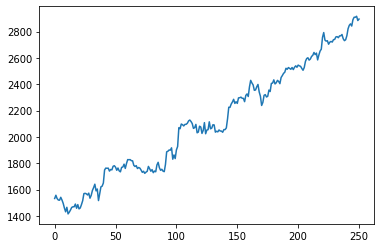

In [6]:
df['Close'].plot()

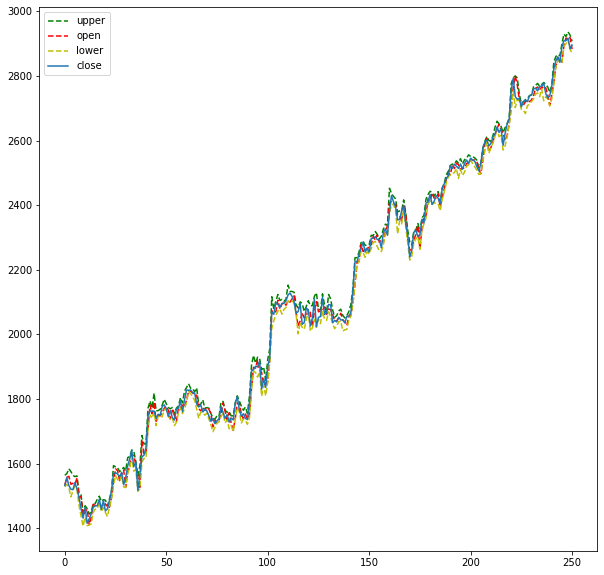

In [12]:
plt.figure(figsize=(10,10))
plt.plot(df['High'], 'g--', label="upper")
plt.plot(df['Open'], 'r--', label="open")
plt.plot(df['Low'], 'y--', label="lower")
plt.plot(df['Close'], label="close")
plt.legend()
plt.show()

In [3]:
forecast_col = 'Close'
forecast_out = 5
test_size = 0.2

# calling the method were the cross validation and data preperation is in
X_train, X_test, Y_train, Y_test, X_lately = prepare_data(
    df, forecast_col, forecast_out, test_size)
learner = LinearRegression()  # initializing linear regression model

learner.fit(X_train, Y_train)  # training the linear regression model

score = learner.score(X_test, Y_test)  # testing the linear regression model
# set that will contain the forecasted data
forecast = learner.predict(X_lately)
response = {}  # creting json object
response['test_score'] = score
response['forecast_set'] = forecast

print(response)

{'test_score': 0.9643198777897881, 'forecast_set': array([2946.15816697, 2946.00643161, 2953.6994307 , 2920.84244287,
       2932.09848851])}
